In [1]:
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt
from model_spec import model_spec
from pol_model import load_bands, model_p, get_a_b
from draine_dust_2D import draine_dust
from scipy.optimize import minimize, LinearConstraint

In [2]:
#The measured values in each band. 
p_measured = np.array([0.0973, 0.1085, 0.1466])
p_unc = np.array([0.0037, 0.0023, 0.0041])

In [3]:
def pol_plot(p_measured, p_unc, mod_p, spec):
    wave = np.array([5500., 6500., 8000.]) / spec.zspec
    plt.errorbar(wave, p_measured, yerr=p_unc, fmt='o', label='Measurements')
    plt.plot(wave, mod_p, 'ks', label='Dust SMC')
    plt.legend()
    plt.xlabel('Wavelength (Angstroms)')
    plt.ylabel('Polarization fraction')
    plt.show()

## Model the SDSS Spectrum

In [4]:
spec, model = model_spec()

## Model the Broad-band polarizations

In [5]:
bands = load_bands()

In [6]:
def chi2(x, dust, spec):
    phi = x[3]
    theta = dust.pfrac(spec.lam_rest.to(u.um).value, phi).flatten()
    a, b = get_a_b(theta, theta, bands, spec, model)
    p_mod = np.zeros(3)
    for j in range(3):
        p_mod[j] = model_p(x[:3], a[j], b[j])
    return np.sum(((p_measured-p_mod)/p_unc)**2)

In [7]:
dust_types = ["SMC", "LMC", "MW"]
mod_p = np.zeros((len(dust_types),len(bands)))
for k, dust_type in enumerate(dust_types):

    dust = draine_dust(type=dust_type)
    x0 = np.array([0.5, 1.0, 50., 90.])
    G = np.identity(x0.shape[0])
    min_vals = [0., 0., 0., 0.]
    max_vals = [1., 1., 360., 180.]
    lincon = LinearConstraint(G, min_vals, max_vals)
    xopt = minimize(chi2, x0=x0, constraints=lincon, args=(dust, spec))
    print(xopt)

    phi = xopt.x[3]
    theta = dust.pfrac(spec.lam_rest.to(u.um).value, phi).flatten()
    a, b = get_a_b(theta, theta, bands, spec, model)

    for j in range(len(bands)):
        mod_p[k,j] = model_p(xopt.x[:3], a[j], b[j])
        print(mod_p[j])

    #pol_plot(p_measured, p_unc, mod_p, spec)

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 33.16486653131156
       x: [ 9.625e-01  1.000e+00  9.780e+01  8.203e+01]
     nit: 14
     jac: [ 9.763e-03 -7.552e+01  2.775e-04  1.030e-04]
    nfev: 76
    njev: 14
[0.08908801 0.         0.        ]
[0. 0. 0.]
[0. 0. 0.]
 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 553.4647087279523
       x: [ 1.000e+00  1.000e+00  8.034e+01  7.278e+01]
     nit: 23
     jac: [-4.792e+02 -1.169e+00  1.907e-04 -3.281e-04]
    nfev: 122
    njev: 23
[0.08908801 0.11548834 0.12872524]
[0.09476382 0.11161063 0.        ]
[0. 0. 0.]
 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 22.32672394920548
       x: [ 1.000e+00  1.000e+00  7.952e+01  7.671e+01]
     nit: 19
     jac: [-9.080e+01 -3.885e+01 -7.963e-05  9.966e-05]
    nfev: 103
    njev: 19
[0.08908801 0.11548834 0.12872524]
[0.09476382 0.11161063 0.05034463]
[0.09121569 0.11320795 0.130493

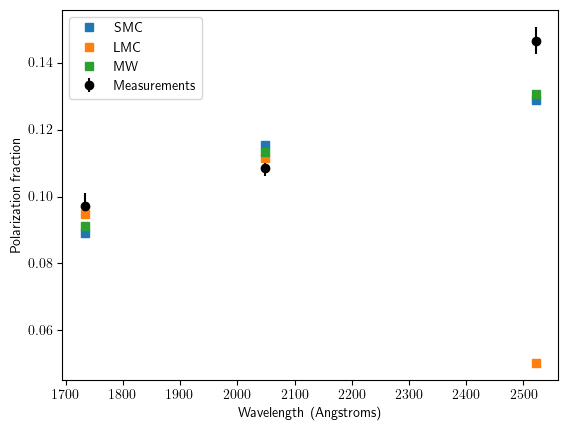

In [8]:
wave = np.array([5500., 6500., 8000.]) / spec.zspec

fig, ax = plt.subplots(1)

ax.errorbar(wave, p_measured, yerr=p_unc, fmt='ko', label='Measurements')
for k, dust_type in enumerate(dust_types):
    ax.plot(wave, mod_p[k], 's', label=dust_type)
ax.legend()
ax.set_xlabel('Wavelength (Angstroms)')
ax.set_ylabel('Polarization fraction')
plt.show()

### Dust for continuum and Gas for Broad Lines.

In [9]:
def chi2(x, dust, spec):
    phi = x[3]
    theta_A = dust.pfrac(spec.lam_rest.to(u.um).value, phi).flatten()
    theta_B = np.ones(len(spec.lam_rest))
    a, b = get_a_b(theta_A, theta_B, bands, spec, model)
    p_mod = np.zeros(3)
    for j in range(3):
        p_mod[j] = model_p(x[:3], a[j], b[j])
    return np.sum(((p_measured-p_mod)/p_unc)**2)

In [10]:
dust_types = ["SMC", "LMC", "MW"]
mod_p = np.zeros((len(dust_types),len(bands)))
for k, dust_type in enumerate(dust_types):

    dust = draine_dust(type=dust_type)
    x0 = np.array([0.5, 1.0, 50., 90.])
    G = np.identity(x0.shape[0])
    min_vals = [0., 0., 0., 0.]
    max_vals = [1., 1., 360., 180.]
    lincon = LinearConstraint(G, min_vals, max_vals)
    xopt = minimize(chi2, x0=x0, constraints=lincon, args=(dust, spec))
    print(xopt)

    phi = xopt.x[3]
    theta_A = dust.pfrac(spec.lam_rest.to(u.um).value, phi).flatten()
    theta_B = np.ones(len(spec.lam_rest))
    a, b = get_a_b(theta_A, theta_B, bands, spec, model)

    for j in range(len(bands)):
        mod_p[k,j] = model_p(xopt.x[:3], a[j], b[j])
        print(mod_p[k,j])

    #pol_plot(p_measured, p_unc, mod_p, spec)

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 25.0897904840653
       x: [ 1.000e+00  4.804e-01  9.001e+01  9.077e+01]
     nit: 93
     jac: [-1.679e+02 -1.954e-01  3.028e-05  2.923e-04]
    nfev: 504
    njev: 93
0.11050067586984422
0.10329589765856173
0.13556700034676844
 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 622.9119214060642
       x: [ 1.000e+00  2.657e-02  8.986e+01  4.867e+01]
     nit: 68
     jac: [-4.785e+02 -2.948e-02 -7.629e-06  1.945e-03]
    nfev: 357
    njev: 67
0.11754533330949349
0.10157366657032188
0.047527212344255276
 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 84.0918900061063
       x: [ 1.000e+00  2.963e-13  1.510e+02  4.806e+01]
     nit: 15
     jac: [-2.513e+02  2.325e+02  0.000e+00  3.595e-04]
    nfev: 84
    njev: 15
0.11131909940923518
0.1079694664389298
0.11237480391997273


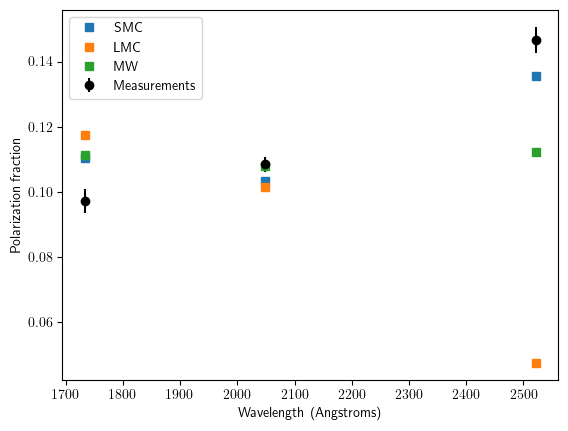

In [11]:
wave = np.array([5500., 6500., 8000.]) / spec.zspec

fig, ax = plt.subplots(1)

ax.errorbar(wave, p_measured, yerr=p_unc, fmt='ko', label='Measurements')
for k, dust_type in enumerate(dust_types):
    ax.plot(wave, mod_p[k], 's', label=dust_type)
ax.legend()
ax.set_xlabel('Wavelength (Angstroms)')
ax.set_ylabel('Polarization fraction')
plt.show()